## El Problema
### Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

### Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#📌 Extracción

In [1]:
# Importamos las librerias necesarias para nuestro proyecto 
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

In [2]:
# Conociendo el df, recopilamos los datos de una fuente externa en este caso un archivo .json desde github
df = pd.read_json(r"https://raw.githubusercontent.com/ganv1/TelecomX_LATAM/refs/heads/main/TelecomX_Data.json")
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Exploración inicial, antes de transformar los datos, revisemos su estructura y la información general del dataframe
print(df.info())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [4]:
# Verificamos la estructura del archivo json
import json
warnings.filterwarnings("ignore")
# Ver la estructura del JSON
with open(r"TelecomX_Data.json") as f:
    data = json.load(f)

# Mostramos  los 2 primeros registros con formato json con sangria  de 4 espacios para explorar la data de forma legible.

print(json.dumps(data[:2], indent=4))  

[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gen

In [ ]:

# Normalizamos la estructura del archivo JSON
df = pd.json_normalize(data)

# Visualización inicial

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
# Estadisticas generales del dataframe, para conocer los datos que contiene
print(df.describe())


       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly
count             7267.000000      7267.000000              7267.000000
mean                 0.162653        32.346498                64.720098
std                  0.369074        24.571773                30.129572
min                  0.000000         0.000000                18.250000
25%                  0.000000         9.000000                35.425000
50%                  0.000000        29.000000                70.300000
75%                  0.000000        55.000000                89.875000
max                  1.000000        72.000000               118.750000


In [7]:
# Mostrar primeras filas del dataset
print(df.head(10))



   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   
5  0013-MHZWF    No          Female                       0               No   
6  0013-SMEOE    No          Female                       1              Yes   
7  0014-BMAQU    No            Male                       0              Yes   
8  0015-UOCOJ    No          Female                       1               No   
9  0016-QLJIS    No          Female                       0              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9

In [8]:
# Mostrar cantidad de valores nulos por columna
print(df.isnull().sum())


customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


#🔧 Transformación

In [ ]:
# Convertimos las variables de texto en valores numéricos para facilitar el procesamiento.
# Mapeamos variables categóricas a valores numéricos para facilitar su análisis


df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["customer.gender"] = df["customer.gender"].map({"Female": 0, "Male": 1})
df["account.Contract"] = df["account.Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
df["account.PaperlessBilling"] = df["account.PaperlessBilling"].map({"Yes": 1, "No": 0})

In [10]:
# Convertir "account.Charges.Total" a numérico
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

# Eliminamos duplicados
df = df.drop_duplicates()

# Revisamos los cambios
print(df.info())  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   int64  
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

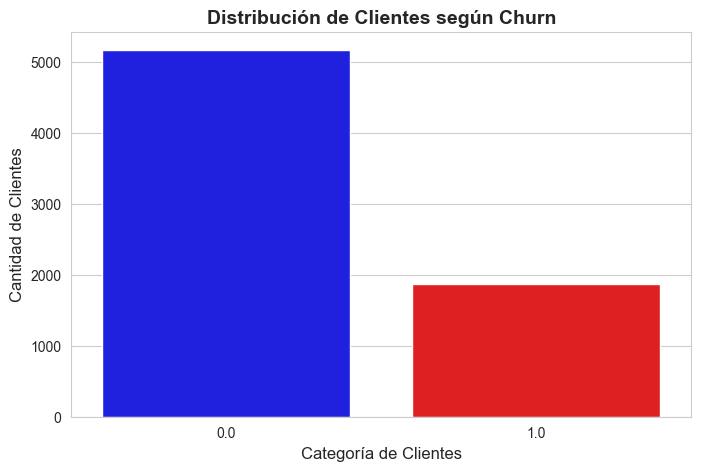

In [ ]:
# Contar los valores de cada categoría
churn_counts = df["Churn"].value_counts()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
  

# Crear el gráfico de barras
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["blue", "red"])

# Etiquetas y título
plt.xlabel("Categoría de Clientes", fontsize=12)
plt.ylabel("Cantidad de Clientes", fontsize=12)
plt.title("Distribución de Clientes según Churn", fontsize=14, fontweight="bold")


plt.show()

#📊 Carga y análisis

In [12]:
# Guardamos un archivo csv para futuras consultas y/o análisis

df.to_csv("DatosLimpios.csv", index=False)

1. Analisis demográfico

In [13]:
demograficos = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents']
for var in demograficos:
    print(f"\nTasa de Perdida de Clientes por {var}:")
    print(df.groupby(var)['Churn'].mean().round(4)*100)


Tasa de Perdida de Clientes por customer.gender:
customer.gender
0    26.92
1    26.16
Name: Churn, dtype: float64

Tasa de Perdida de Clientes por customer.SeniorCitizen:
customer.SeniorCitizen
0    23.61
1    41.68
Name: Churn, dtype: float64

Tasa de Perdida de Clientes por customer.Partner:
customer.Partner
No     32.96
Yes    19.66
Name: Churn, dtype: float64

Tasa de Perdida de Clientes por customer.Dependents:
customer.Dependents
No     31.28
Yes    15.45
Name: Churn, dtype: float64


2. Analisis por Servicios contratados

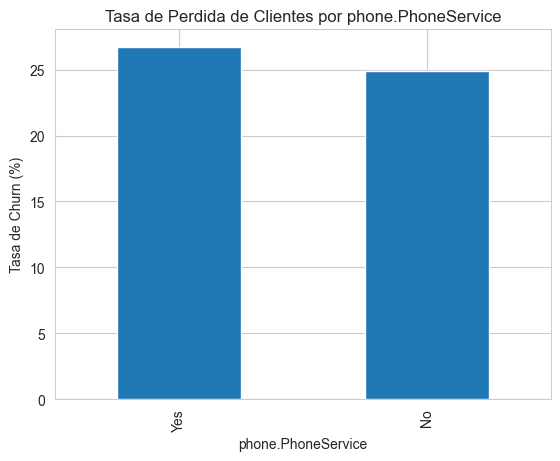

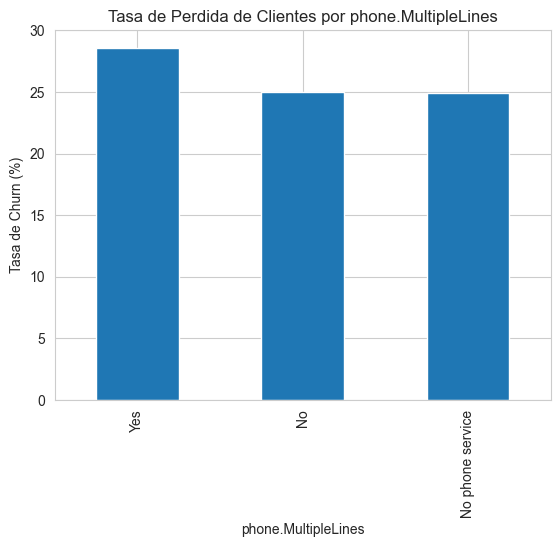

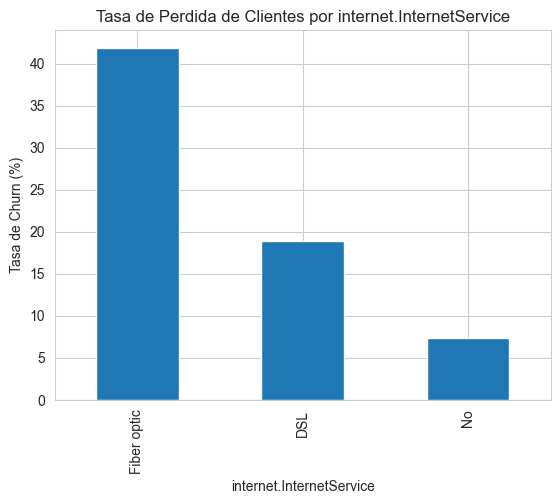

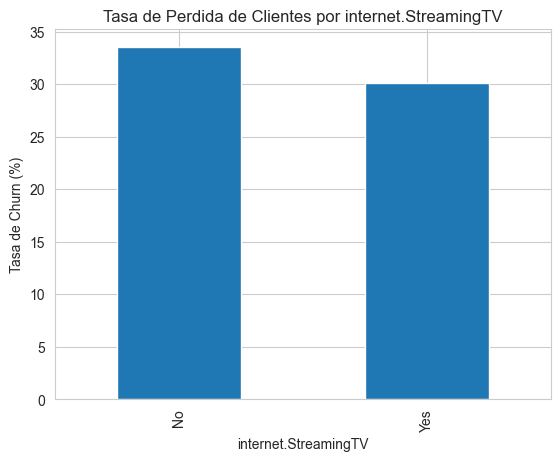

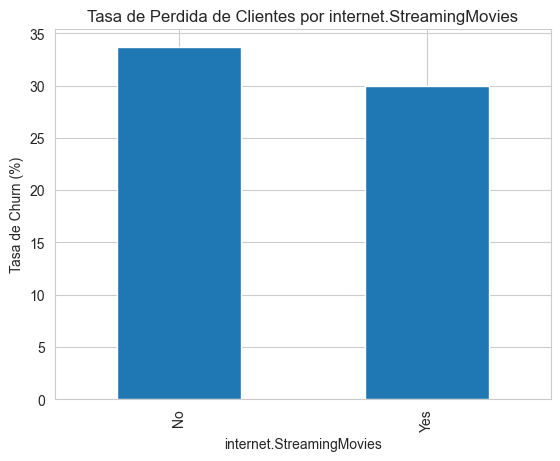

In [14]:
servicios = {
    'phone.PhoneService': ['Yes', 'No'],
    'phone.MultipleLines': ['No phone service', 'No', 'Yes'],
    'internet.InternetService': ['DSL', 'Fiber optic', 'No'],
    'internet.StreamingTV': ['No', 'Yes'],
    'internet.StreamingMovies': ['No', 'Yes']
}

for servicio, categorias in servicios.items():
    
    # Filtra solo las categorías relevantes
    temp = df[df[servicio].isin(categorias)]
    
    # Calcular la tasa de Churn por categoría
    churn_por_servicio = (
        temp.groupby(servicio)['Churn']
        .mean()
        .sort_values(ascending=False)
        .round(4) * 100
    )
    # Graficar 
    if len(churn_por_servicio) > 1:
        churn_por_servicio.plot(kind='bar', title=f'Tasa de Perdida de Clientes por {servicio}')
        plt.ylabel('Tasa de Churn (%)')
        plt.show()
    else:
        print(f"{servicio}:")
        print(churn_por_servicio)

3. Analisis de Servicios adicionales (Seguridad y protección)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

addons = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport']

# Crear figura 
fig = make_subplots(rows=1, cols=len(addons), specs=[[{'type':'domain'}]*len(addons)],
                    subplot_titles=[f'Churn por {addon}' for addon in addons])

for i, addon in enumerate(addons, start=1):
    churn_rates = df.groupby(addon)['Churn'].mean().round(4) * 100
    
    
    if len(churn_rates) > 1:
        fig.add_trace(
            go.Pie(
                labels=churn_rates.index,
                values=churn_rates.values,
                textinfo='percent',
                hole=0.3  
            ),
            row=1, col=i
        )
    else:
        
        fig.layout.annotations[i-1].text += f"<br>{churn_rates.iloc[0]:.2f}%"

# Configurar fondo 
fig.update_layout(
    showlegend=False,
    height=400,
    width=1200,
    margin=dict(t=80, b=20, l=20, r=20),
    plot_bgcolor='rgba(0,0,0,0)',   
    paper_bgcolor='rgba(0,0,0,0)'   
)

fig.show()


Lo que podemos deducir a partir de estos  gráficos es:
Servicios de seguridad y soporte reducen el churn:

- Los clientes que contratan servicios como OnlineSecurity, DeviceProtection y TechSupport suelen mostrar tasas de churn más bajas. Esto indica que estos servicios agregan valor percibido y aumentan la satisfacción y fidelidad del cliente.

- Clientes que no tienen estos servicios adicionales presentan tasas de churn significativamente más altas, lo que puede reflejar una percepción de menor protección, soporte o beneficios, aumentando la probabilidad de que se vayan.

Servicios de respaldo en línea (OnlineBackup) pueden tener un efecto similar, aunque su impacto puede ser menor .



Analizamos si el gasto total influye en la cancelación de clientes

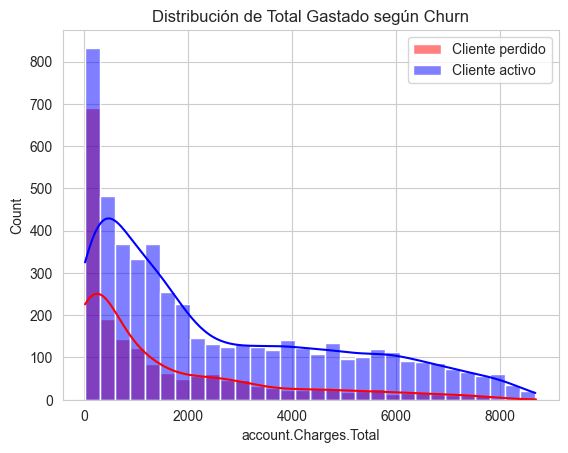

In [16]:
# Vizualisamos el gasto total segun Perdida de clientes (Churn)
sns.histplot(df[df["Churn"] == 1]["account.Charges.Total"], bins=30, kde=True, color="red", label="Cliente perdido")
sns.histplot(df[df["Churn"] == 0]["account.Charges.Total"], bins=30, kde=True, color="blue", label="Cliente activo")
plt.legend()
plt.title("Distribución de Total Gastado según Churn")
plt.show()

- Distribucion de la Perdida de clientes segun tipo de contrato, 
- Observamos que los contratos  "mes a mes" , tienen  mayor tasa de perdida de clientes.
- (0 = mes a mes, 1 = un año, 2 = dos años)


In [17]:
# 4. Análisis de contratos y facturación
contratos = df.groupby('account.Contract')['Churn'].mean().round(4)*100
facturacion = df.groupby('account.PaperlessBilling')['Churn'].mean().round(4)*100

print("\nChurn por tipo de contrato:")
print(contratos)
print("\nChurn por facturación paperless:")
print(facturacion)


Churn por tipo de contrato:
account.Contract
0    42.71
1    11.27
2     2.83
Name: Churn, dtype: float64

Churn por facturación paperless:
account.PaperlessBilling
0    16.33
1    33.57
Name: Churn, dtype: float64


- Los clientes con contratos a largo plazo (1 año o 2 años) tienden a tener una tasa de churn ligeramente menor que los clientes con contratos mes a mes.  - Esto sugiere que los contratos más largos generan mayor compromiso y fidelidad, reduciendo la probabilidad de abandono.
- Los contratos mes a mes, aunque ofrecen mayor flexibilidad, presentan un mayor riesgo de churn debido a la facilidad para cancelar el servicio.

- Facturación sin papel (PaperlessBilling)
- La preferencia por facturación electrónica (sin papel) no muestra una diferencia significativa en la tasa de churn respecto a la facturación tradicional, - lo que indica que este factor por sí solo no influye mucho en la retención.

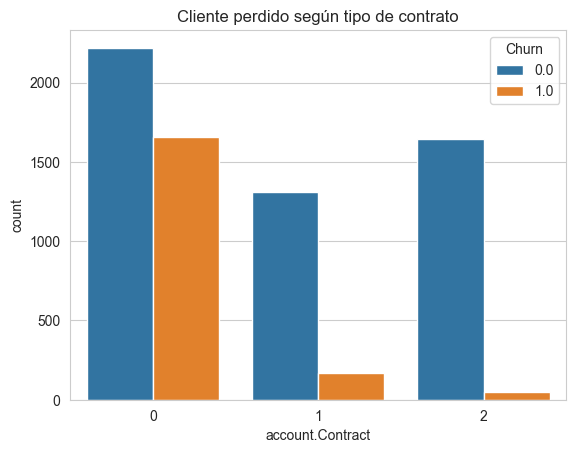

In [18]:
# Graficamos 
sns.countplot(data=df, x="account.Contract", hue="Churn")
plt.title("Cliente perdido según tipo de contrato")
plt.show()

- Relación entre tiempo de permanencia y estado del cliente
- Observamos que los clientes con menos tiempo de contrato tienen más probabilidad de cancelar.

In [19]:

# Creamos  gráfico de boxplot
fig = px.box(df, x="Churn", y="customer.tenure", color="Churn",
             title="Relación entre Tiempo de Permanencia y Estado del Cliente",
             labels={"Churn": "Estado del Cliente", "customer.tenure": "Tiempo de Permanencia (meses)"},
             color_discrete_map={0: "#2ca02c", 1: "#d62728"})

# Mejorar etiquetas en eje X
fig.update_xaxes(tickvals=[0, 1], ticktext=["Cliente Activo", "Cliente Perdido"])


fig.show()

- Distribucion de la Perdida de clientes por genero
- No se aprecia diferencia significativa en la tasa de abandono separado por genero

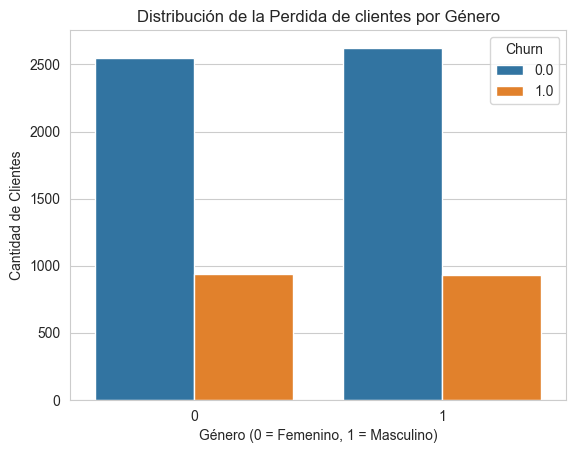

In [20]:

sns.countplot(data=df, x="customer.gender", hue="Churn")
plt.title("Distribución de la Perdida de clientes por Género")
plt.xlabel("Género (0 = Femenino, 1 = Masculino)")
plt.ylabel("Cantidad de Clientes")
plt.show()

- Graficamos perdida de clientes segun tipo de contrato
- Observamos que los clientes con contratos más cortos tienen mayor probabilidad de que se pierdan (0.0 = Cliente activo, 1.0 = Cliente perdido)

In [21]:
# Contar clientes activos y perdidos por tipo de contrato
df_grouped = df.groupby(["account.Contract", "Churn"]).size().reset_index(name="count")

# Mapeo de etiquetas de contrato para mejor legibilidad
contract_labels = {0: "Mensual", 1: "Un año", 2: "Dos años"}
df_grouped["account.Contract"] = df_grouped["account.Contract"].map(contract_labels)

# Crear gráfico de barras interactivo
fig = px.bar(df_grouped, x="account.Contract", y="count", color=df_grouped["Churn"].astype(str),
             title="Pérdida de Cliente según Tipo de Contrato",
             labels={"account.Contract": "Tipo de Contrato", "count": "Cantidad de Clientes"},
             color_discrete_map={"0": "#A7C7E7", "1": "#F4C2C2"},
             barmode="group")

# Ajustar tamaño y presentación para mejor apariencia
fig.update_layout(margin=dict(l=50, r=50, t=50, b=50))

# Mostrar gráfico interactivo
fig.show()

- Graficamos perdida de clientes según método de pago
- El metodo de  pago "Electronic check" y en menor medida "Mailed check" presentan  mayor tasa de clientes perdidos
- ( 0.0 = Clientes activos, 1.0 = clientes perdidos)

In [22]:
# Contar clientes activos y perdidos por método de pago
df_grouped = df.groupby(["account.PaymentMethod", "Churn"]).size().reset_index(name="count")

# Crear gráfico de barras interactivo con etiquetas mejoradas
fig = px.bar(df_grouped, x="account.PaymentMethod", y="count", color=df_grouped["Churn"].astype(str),
             title="Pérdida de Clientes según Método de Pago",
             labels={"account.PaymentMethod": "Método de Pago", "count": "Cantidad de Clientes"},
             color_discrete_map={"0": "#A7C7E7", "1": "#F4C2C2"},
             barmode="group")

# Rotación de etiquetas en eje X para mejorar la legibilidad
fig.update_xaxes(title_text="Método de Pago", tickangle=45)

# Ajustar márgenes para mejor presentación
fig.update_layout(margin=dict(l=50, r=50, t=50, b=50))

# Mostrar gráfico interactivo
fig.show()

In [23]:
# Calculamos  de la facturacion diaria
df["account.DailyCharges"] = df["account.Charges.Monthly"] / 30

print(df[["account.Charges.Monthly", "account.DailyCharges"]].head())

   account.Charges.Monthly  account.DailyCharges
0                     65.6              2.186667
1                     59.9              1.996667
2                     73.9              2.463333
3                     98.0              3.266667
4                     83.9              2.796667


- Creamos una nueva columna account.DailyCharges que representa el gasto diario de cada cliente
- Esto puede ser útil para identificar patrones de consumo más precisos, como fluctuaciones de gasto o correlaciones con cancelaciones.
- el grafico  permite ver si hay diferencias marcadas en el comportamiento de gasto diario.

In [24]:
import plotly.express as px

# Creamos histograma 
fig = px.histogram(df, x="account.DailyCharges", nbins=30, opacity=0.8, 
                   title="Distribución de Facturación Diaria de los Clientes",
                   color_discrete_sequence=["#8E09EC"], 
                   marginal="box") 

fig.update_layout(
    xaxis_title="Facturación Diaria",
    yaxis_title="Cantidad de Clientes",
    template="plotly_white",
    bargap=0.05 
)
fig.show()

In [25]:
# Creamos la columna cantidad de servicios contratados
df["CantidadServicios"] = (
    (df["phone.PhoneService"] == "Yes").astype(int) + 
    (df["phone.MultipleLines"] == "Yes").astype(int) +
    (df["internet.InternetService"] != "No").astype(int) + 
    (df["internet.OnlineSecurity"] == "Yes").astype(int) +
    (df["internet.OnlineBackup"] == "Yes").astype(int) + 
    (df["internet.DeviceProtection"] == "Yes").astype(int) +
    (df["internet.TechSupport"] == "Yes").astype(int) +
    (df["internet.StreamingTV"] == "Yes").astype(int) +
    (df["internet.StreamingMovies"] == "Yes").astype(int)
)

print(df[["CantidadServicios"]].head())  


   CantidadServicios
0                  5
1                  4
2                  3
3                  6
4                  4


In [26]:
# Calculamos la correlación entre cantidad de servicios y Perdida de Clientes (Churn)
print(df[["CantidadServicios", "Churn"]].corr())

                   CantidadServicios     Churn
CantidadServicios           1.000000 -0.019375
Churn                      -0.019375  1.000000


- Se suman los servicios contratados por cada cliente.
- Convertimos "Yes" en 1 y "No" en 0 para obtener un número total de servicios por cliente.
- Verificamos si la cantidad de servicios contratados influye en la cancelacion de clientes

In [27]:
# Visualizamos los datos
import plotly.express as px

# Calculamos la tasa de churn para cada cantidad de servicios
df_grouped = df.groupby("CantidadServicios")["Churn"].mean().reset_index()

# Crear gráfico de líneas
fig = px.line(df_grouped, x="CantidadServicios", y="Churn",
              title="Relación entre Cantidad de Servicios y Cliente Perdido",
              labels={"CantidadServicios": "Número de Servicios Contratados", "Churn": "Tasa de Cliente Perdido"},
              line_shape="linear", markers=True)
fig.update_traces(marker=dict(size=10, symbol="circle-open", color="red"))

# Mostramos el gráfico
fig.show()

- Usamos un gráfico de lineas para ver si los clientes con más servicios tienen una tasa de  cancelación menor

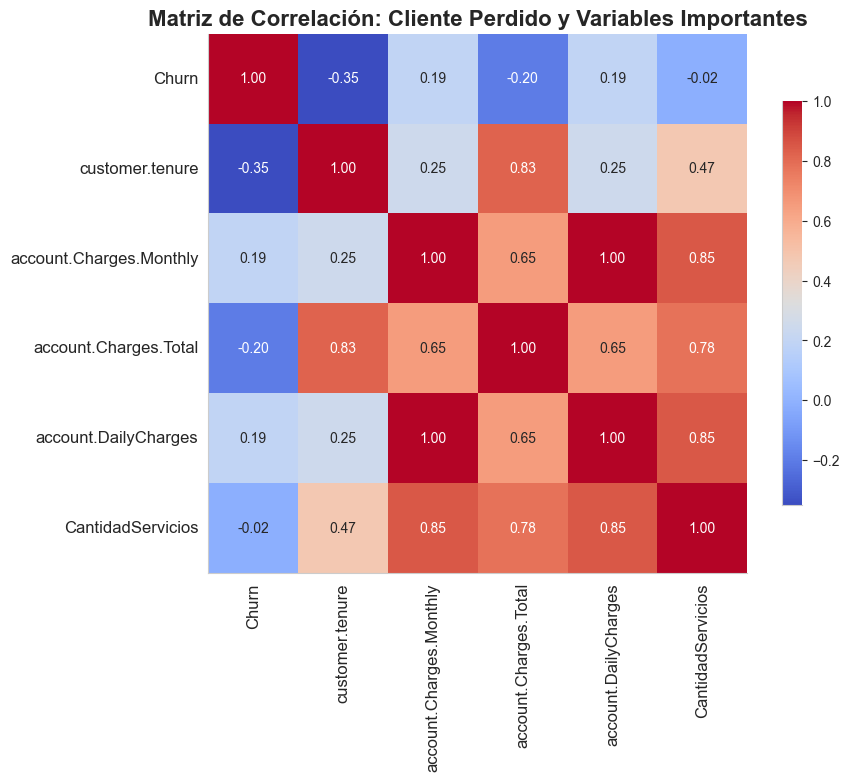

In [28]:
# Matriz de correlacion entre el "Cliente perdido" y las variables que lo afectan

# Selección de las variables de interés
variables_importantes = [
    "Churn", 
    "customer.tenure", 
    "account.Charges.Monthly", 
    "account.Charges.Total", 
    "account.DailyCharges", 
    "CantidadServicios"
]

# Calcular la matriz de correlación
corr_matrix = df[variables_importantes].corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    square=True, 
    cbar_kws={"shrink": .75}
)
plt.title("Matriz de Correlación: Cliente Perdido y Variables Importantes", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine() 
plt.show()

#📄Informe final

### 1. Introducción

Después de haber sido contratado como asistente de análisis de datos en TelecomX y de formar parte del equipo encargado del proyecto 'Churn de Clientes', la empresa logró identificar, mediante un exhaustivo análisis de sus indicadores de gestión, una elevada tasa de cancelación de servicios. Esta situación ha generado una preocupación significativa, ya que es fundamental comprender los diversos factores que contribuyen a la pérdida de clientes. La empresa reconoce que entender estas dinámicas no solo es crucial para desarrollar estrategias efectivas de retención, sino que también tiene un impacto directo en sus resultados financieros. Por lo tanto, se requiere un enfoque metódico y analítico para investigar las causas subyacentes de la cancelación y así implementar soluciones que mejoren la satisfacción del cliente y, en consecuencia, la rentabilidad de la empresa.



### 2. Limpieza y tratamiento de los datos

Se realizaron varios procesos clave para garantizar que la información estuviera lista para su análisis y modelado:
Inspección general del dataset

Se analizó la cantidad de registros, tipos de datos y valores únicos para detectar posibles problemas iniciales.

Mostrar  las filas del dataset, Verificar tipos de datos y valores nulos, Descripción estadística de las variables numéricas, etc


•  Eliminación de valores nulos y duplicados: Se identificaron registros con datos faltantes o duplicados y se tomaron decisiones sobre cómo manejarlos,   ya sea eliminándolos o imputando valores.

•  Corrección de inconsistencias: Se revisaron las variables para corregir errores tipográficos, formatos incorrectos y valores fuera de rango.

•  Transformación de datos categóricos y numéricos: Se realizó la codificación de variables categóricas (por ejemplo, convertir nombres de planes en valores numéricos) y la normalización/escalamiento de variables numéricas para mejorar la eficiencia del modelo.

•  Creación de nuevas variables: Se generaron nuevas características a partir de las existentes, como tasas de uso, segmentaciones de clientes y métricas de interacción.

•  Eliminación de ruido e información irrelevante: Se descartaron variables que no aportaban valor al análisis o que podían introducir sesgos.

•  Manejo de datos desbalanceados: Se aplicaron técnicas como el sobremuestreo o submuestreo para equilibrar la cantidad de clientes que abandonaron vs. los que permanecieron.

Estos procesos fueron esenciales para garantizar que los datos fueran confiables y estuvieran optimizados para predecir la probabilidad de que un cliente abandone el servicio.


### 3.  Analisis exploratorio de Datos

Se realizaron diversas técnicas para comprender la estructura, distribución y características clave de los datos

###   Factores claves en la cancelación de clientes

•   Clientes con menor 'tenure' ( meses de contrato del cliente) tienen mayor tasa de 'Churn' (si el cliente dejó o no la empresa).

•	 Los clientes que han estado menos de 12 meses en la empresa presentan una tasa de abandono más alta.

•	 Clientes con contratos mes a mes tienen una mayor probabilidad de cancelar.

•   El tipo de Internet influye en el abandono.

•	 Clientes con DSL tienen una tasa de cancelación más alta en comparación con Fibra Óptica.

•   Los servicios adicionales ayudan a reducir la cancelación:

•	 OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport están correlacionados con tasas más bajas de abandono.

•   El método de pago impacta en la retención.

•	 Los clientes que pagan con Electronic Check presentan mayor tasa de cancelación que aquellos con pagos automáticos.


###  Características del perfil de clientes propensos a cancelar

•   Clientes sin pareja y sin dependientes tienen mayor tasa de Churn.

•	 Los clientes con familia tienden a permanecer más tiempo con la empresa.


### Los clientes con facturas digitales (PaperlessBilling) tienden a cancelar más rápido.

•	 Puede deberse a una falta de contacto directo con la empresa.


### El monto mensual influye en la cancelación.

•	 Clientes con tarifas altas (>80 USD) muestran una mayor tasa de abandono.


### Variable de  Interés
 
 La variable de mayor interés en este análisis es ***Churn***, ya que representa la cancelación de clientes, y es clave para entender que factores influyen en su abandono. Tras estudiar las variables numéricas y categóricas, se identificaron las más relevantes que afectan el Churn, ordenadas de mayor a menor impacto:

1️. tenure: Los clientes con menos tiempo en la empresa (≤12 meses) tienen una tasa de cancelación más alta. La fidelización temprana es crucial.

2️. Contract: Los contratos mes a mes están altamente relacionados con el abandono; los de plazo fijo retienen mejor a los clientes.

3️. Charges.Monthly: Los clientes con tarifas altas (≥80 USD) presentan mayor riesgo de cancelación, sugiriendo que el precio influye significativamente.

4️. InternetService: Aquellos con DSL tienen mayor tasa de Churn, mientras que Fibra Óptica retiene mejor a los clientes.

5️. Servicios adicionales (OnlineSecurity, TechSupport, etc.): Clientes con estos servicios tienen menor probabilidad de abandonar.

6️. PaymentMethod: Los pagos automáticos reducen la cancelación, mientras que Electronic Check tiene la tasa más alta.

### 4. Conclusiones e Insight

1.	El monto facturado y el tiempo de uso son indicadores fuertes del churn

   • Clientes con facturación baja tienden a cancelar el servicio.
   •	Usuarios con menor tiempo de uso también muestran mayor probabilidad de churn.

2.	Planes de bajo costo tienen a una mayor tasa de cancelación

   •	Usuarios en planes económicos muestran menos compromiso y mayor propensión a cambiar de proveedor.

3.	Clientes con poca interacción con la empresa muestran mayor tasa de cancelación

   •	Usuarios que no han contactado soporte o usado beneficios tienen más probabilidades de dejar el servicio.

4.	Patrones de pago y retrasos afectan la retención

   •	Morosidad frecuente está asociada a clientes que eventualmente abandonan el servicio.

5.	Segmentos específicos muestran más vulnerabilidad al abandono del servicios

   •	Morosidad frecuente está asociada a clientes que eventualmente abandonan el servicio.
    	Por ejemplo, clientes nuevos tienen mayor tasa de abandono en los primeros meses.
 

### 5. Recomendaciones

### a.  Implementar estrategias de retención basadas en el uso y la facturación 



   •	Ofrecer descuentos progresivos a clientes con alto riesgo de churn.

   •	Incentivar consumo mediante paquetes de beneficios exclusivos.
   
   •  Ofrecer paquetes atractivos que integren múltiples servicios para aumentar la retención.


### b. Optimizar planes y ofertas para mejorar la fidelización 



   •	Rediseñar planes económicos con beneficios adicionales para evitar el abandono.

   •	Promover upgrades a planes superiores con incentivos atractivos.


### c. Mejorar la comunicación y experiencia con clientes de alto riesgo 



   •	Campañas de engagement con usuarios que no han interactuado recientemente.

   •	Facilitar acceso a soporte proactivo para resolver dudas antes de que cancelen.


### d. Incentivar pagos puntuales para reducir churn por morosidad 



   •	Ofrecer recompensas por pagos a tiempo.

   •	Implementar recordatorios automáticos y opciones de pago flexibles.


### e. Enfocar estrategias en nuevos clientes para reducir su abandono inicial 



   •	Planes de bienvenida con beneficios en los primeros meses.

   •	Seguimiento más cercano a los clientes recién incorporados.
   
   •  La diferenciación mediante servicios adicionales es clave para la retención:


## Estos resultados coinciden con la idea general de que ofrecer valor agregado y mejorar la experiencia del cliente reduce la tasa de "Churn"

